In [1]:
import numpy as np

from nn import Dense, Model, CrossEntropy, Sigmoid, Softmax, Relu, optimizers, Dropout
from nn.dataset import mnist

import tqdm

In [2]:
def validate_model(prediction_function, x_test, y_test):
    equal = []
    for x, y in tqdm.tqdm(
        zip(x_test, y_test), desc="Testing Model Accuracy", leave=True
    ):
        y_ = prediction_function(x)
        equal.append(1 if np.argmax(y_) == np.argmax(y) else 0)
    print(f"Model Accuracy: {sum(equal)/len(equal) * 100:.2f}%\n")


def preprocess_data(x, y, limit):
    def to_categorical(labels):
        row, column = labels.shape[0], 10
        output = np.empty(shape=(row, column))
        for r in range(row):
            temp = np.zeros((1, column))
            temp[0, labels[r]] = 1
            output[r, :] = temp
        return output

    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_limit, test_limit = 60_000, 10_000

x_train, y_train = preprocess_data(x_train, y_train, train_limit)
x_test, y_test = preprocess_data(x_test, y_test, test_limit)

In [4]:
# neural network
model = Model()
model.set_layers(
    [
        Dense(30),
        Sigmoid(),
        # Dropout(0.5),
        Dense(10),
        Softmax(),
    ]
)
model.set_optimizer(
    optimizers.SGD(batch_size=100, learning_rate=3.0, cost_function=CrossEntropy())
)

In [5]:
model.compile_for(input_shape=(28 * 28, 1))
model.summary()

['Dense Layer ((784, 1) -> (30, 1))',
 'Sigmoid Activation',
 'Dense Layer ((30, 1) -> (10, 1))',
 'Softmax Activation']

In [10]:
# train
model.train(
    x_train,
    y_train,
    epochs=10,
    validate_model=lambda prediction_function: validate_model(
        prediction_function, x_test, y_test
    ),
)

Epoch: 0, Error: 0.23185997939107342


Testing Model Accuracy: 10000it [00:04, 2292.78it/s]


Model Accuracy: 94.87%

Epoch: 1, Error: 0.2231089572975631


Testing Model Accuracy: 10000it [00:04, 2298.44it/s]


Model Accuracy: 95.06%

Epoch: 2, Error: 0.21376418612547862


Testing Model Accuracy: 10000it [00:02, 4020.30it/s]


Model Accuracy: 95.52%

Epoch: 3, Error: 0.20207877076118333


Testing Model Accuracy: 10000it [00:02, 3747.84it/s]


Model Accuracy: 95.49%

Epoch: 4, Error: 0.2000171031023858


Testing Model Accuracy: 10000it [00:02, 3486.75it/s]


Model Accuracy: 95.68%

Epoch: 5, Error: 0.19400590675134805


Testing Model Accuracy: 10000it [00:02, 3963.94it/s]


Model Accuracy: 95.59%

Epoch: 6, Error: 0.18595398386180734


Testing Model Accuracy: 10000it [00:02, 3684.41it/s]


Model Accuracy: 95.40%

Epoch: 7, Error: 0.1815163189437897


Testing Model Accuracy: 10000it [00:02, 4184.80it/s]


Model Accuracy: 93.78%

Epoch: 8, Error: 0.177638265763446


Testing Model Accuracy: 10000it [00:02, 3559.90it/s]


Model Accuracy: 95.69%

Epoch: 9, Error: 0.17328973409329812


Testing Model Accuracy: 10000it [00:02, 4211.57it/s]

Model Accuracy: 95.44%



In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# model.predict(x_test[0, :, :]).shape
model.get_layers()[0].weights.shape

(1, 30, 784)

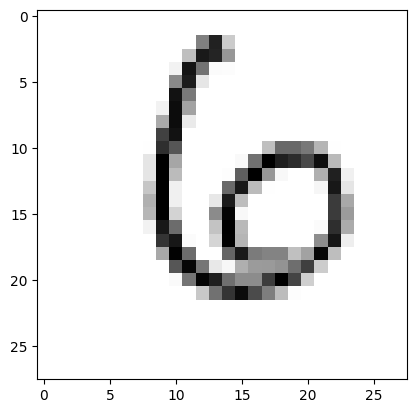

Actual: 6, predicted = 6


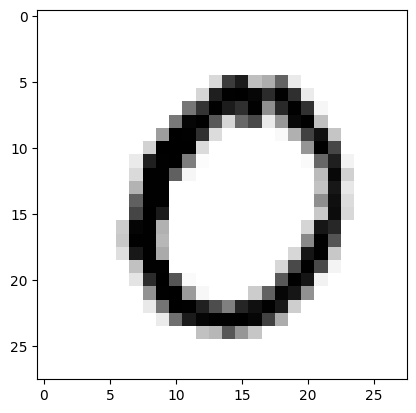

Actual: 0, predicted = 0


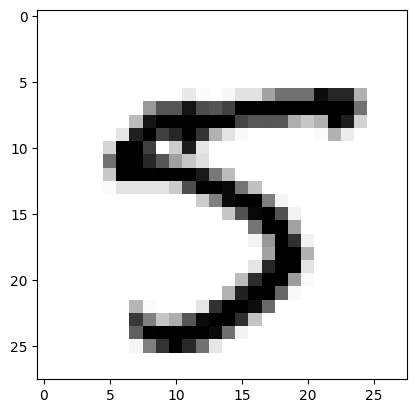

Actual: 5, predicted = 5


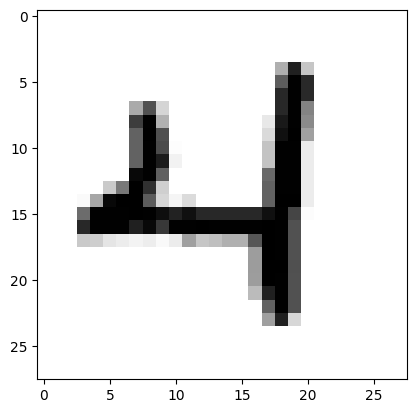

Actual: 4, predicted = 4


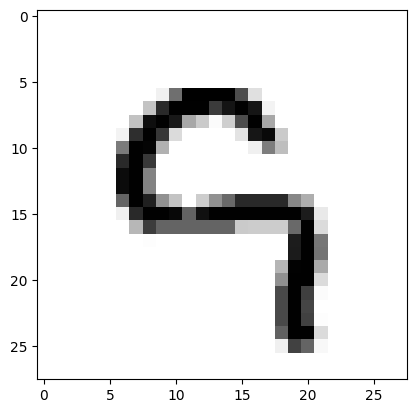

Actual: 9, predicted = 9


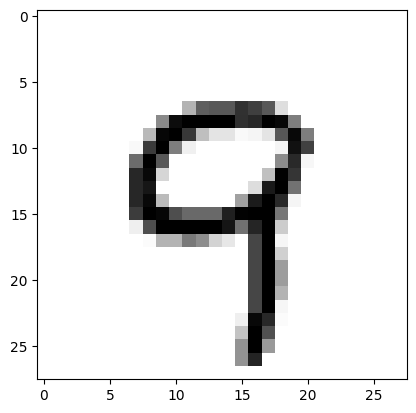

Actual: 9, predicted = 9


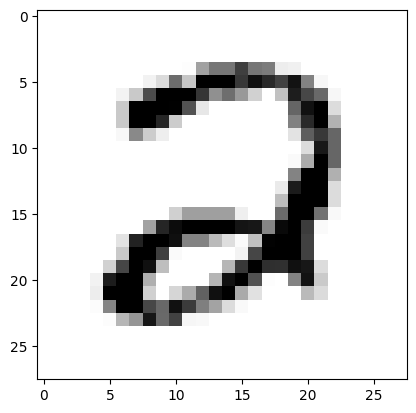

Actual: 2, predicted = 2


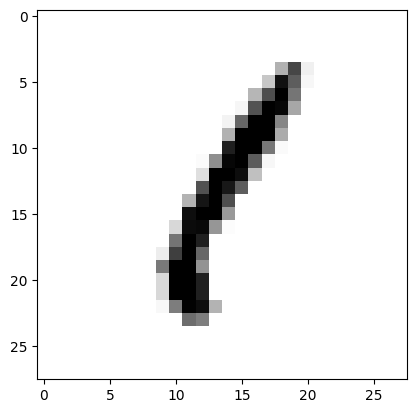

Actual: 1, predicted = 1


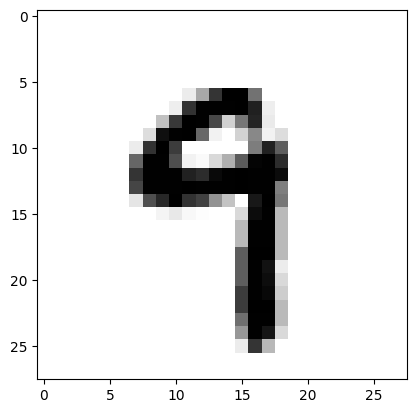

Actual: 9, predicted = 9


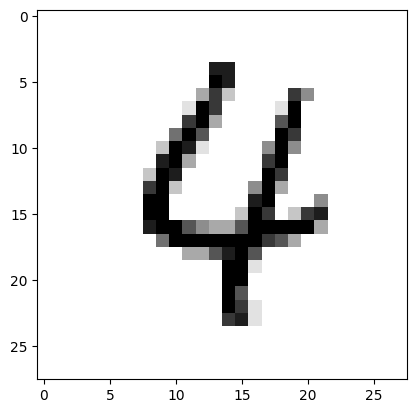

Actual: 4, predicted = 4


In [9]:
index = 100
for index in range(index, index + 10):
    prediction = np.argmax(model.predict(x_test[index, :, :]))
    ground_truth = np.argmax(y_test[index, :, :])

    plt.imshow(x_test[index, :, :].reshape((28, 28)), cmap="binary")
    plt.show()
    print(f"Actual: {ground_truth}, predicted = {prediction}")